> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
<ul>
<li> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.</li>
<li> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.</li>
<li> There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.</li>
<li> The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
</ul>

### Question(s) for Analysis
<ul>
    <li> 1) what is the top 10 highest cost movies? </li>
<li> 2) What are the top 10 highest-grossing films and ad revenue? </li>
<li> 3) What is the top 10 popular movies? </li>
<li> 4) Which genres are most popluar? </li>
<li> 5) What are the top 5 genres ? </li>
<li> 6) What is the average runtime of the movies? </li>
<li> 7) Who are the most popular actors in movies? </li>
<li> 8) which year made the highest profit with advertisement?  </li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0
!pip download python-igraph

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)
  File was already downloaded /home/workspace/python-igraph-0.9.8.tar.gz
  File was already downloaded /home/workspace/igraph-0.9.8.tar.gz
  File was already downloaded /home/workspace/texttable-1.6.4-py2.py3-none-any.whl
Successfully downloaded python-igraph igraph texttable


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_tmdb_movies = pd.read_csv('tmdb-movies.csv')

In [4]:
df_tmdb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df_tmdb_movies.shape

(10866, 21)

In [6]:
df_tmdb_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [7]:
df_tmdb_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
type(df_tmdb_movies['keywords'][0])

str

In [9]:
type(df_tmdb_movies['release_date'][0])

str

In [10]:
type(df_tmdb_movies['genres'][0])

str

In [11]:
df_tmdb_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_tmdb_movies.duplicated().sum()

1

In [13]:
# remove row that is  duplicated
df_tmdb_movies.drop_duplicates(inplace=True)

In [14]:
df_tmdb_movies.duplicated().sum()

0

In [15]:
# remove some col that are unused
cols = ['imdb_id','homepage','tagline','keywords','overview','release_date','production_companies']
df_tmdb_movies.drop(columns= cols,axis=1,inplace=True)

In [16]:
df_tmdb_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [17]:
df_tmdb_movies.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [18]:
df_tmdb_movies.dropna(inplace=True)
df_tmdb_movies.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [19]:
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (what is the top 10 highest cost movies?)

In [20]:
# function for sort data and get the top 10 row in column
def get_ten_row_in_column(column,sort_column):
    data = df_tmdb_movies[column][ df_tmdb_movies.sort_values(by=sort_column,ascending=False).head(10).index]
    return data

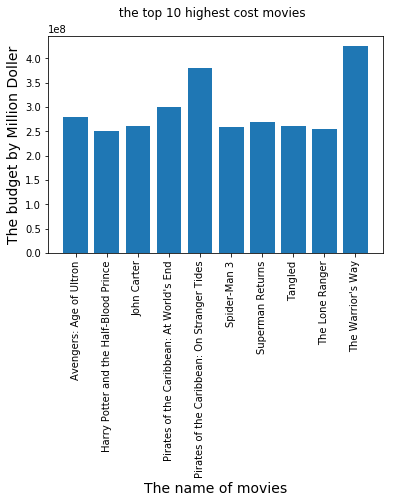

In [21]:
x_axis = get_ten_row_in_column('original_title','budget')
y_axis = get_ten_row_in_column('budget','budget')
plt.xticks(rotation=90)
plt.ylabel("The budget by Million Doller",fontsize=14)
plt.xlabel("The name of movies",fontsize=14)
plt.bar(x_axis,y_axis)
plt.suptitle(" the top 10 highest cost movies")
plt.show()

>Here is the movie with the highest cost

### Research Question 2  (What are the top 10 highest-grossing films and ad revenue?)

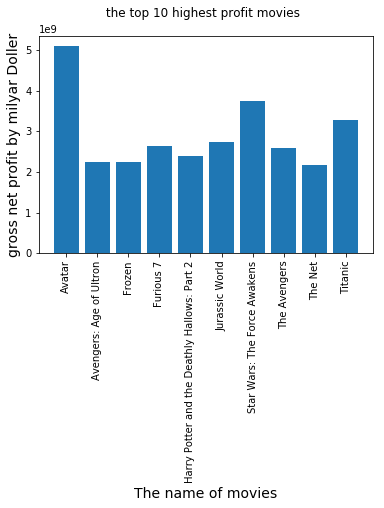

In [22]:
# add columns that have profit of advertisement
df_tmdb_movies['net_profit'] = df_tmdb_movies['revenue'] - df_tmdb_movies['budget'] 
df_tmdb_movies['net_profit_adj'] = df_tmdb_movies['revenue_adj'] - df_tmdb_movies['budget_adj'] 
df_tmdb_movies['gross_net_profit'] = df_tmdb_movies['net_profit'] + df_tmdb_movies['net_profit']
x_axis = get_ten_row_in_column('original_title','gross_net_profit')
y_axis = get_ten_row_in_column('gross_net_profit','gross_net_profit')
plt.xticks(rotation=90)
plt.xlabel("The name of movies",fontsize=14)
plt.ylabel("gross net profit by milyar Doller",fontsize=14)
plt.bar(x_axis,y_axis)
plt.suptitle(" the top 10 highest profit movies")
plt.show()

> Here, the movie with the highest profit is shown in addition to the profit from advertising after deducting the cost of the film and advertising expenses

### Research Question 3) What is the top 10 popular movies?

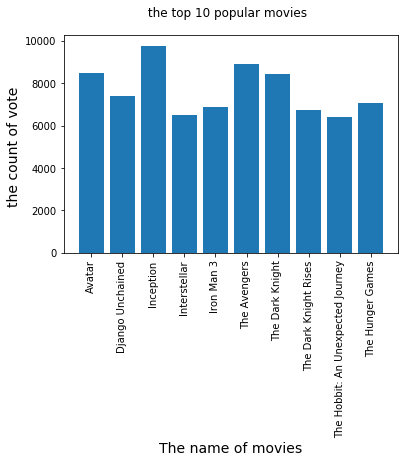

In [23]:
x_axis = get_ten_row_in_column('original_title','vote_count')
y_axis = get_ten_row_in_column('vote_count','vote_count')
plt.xticks(rotation=90)
plt.xlabel("The name of movies",fontsize=14)
plt.ylabel("the count of vote ",fontsize=14)
plt.bar(x_axis,y_axis)
plt.suptitle(" the top 10 popular movies")
plt.show()

> Here is a list of the top 10 most popular movies with the highest audience ratings

### Research Question 4) Which genres are most popluar? 

In [32]:
#function which will take count any column after split text 
def get_count(column):
    data = df_tmdb_movies[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

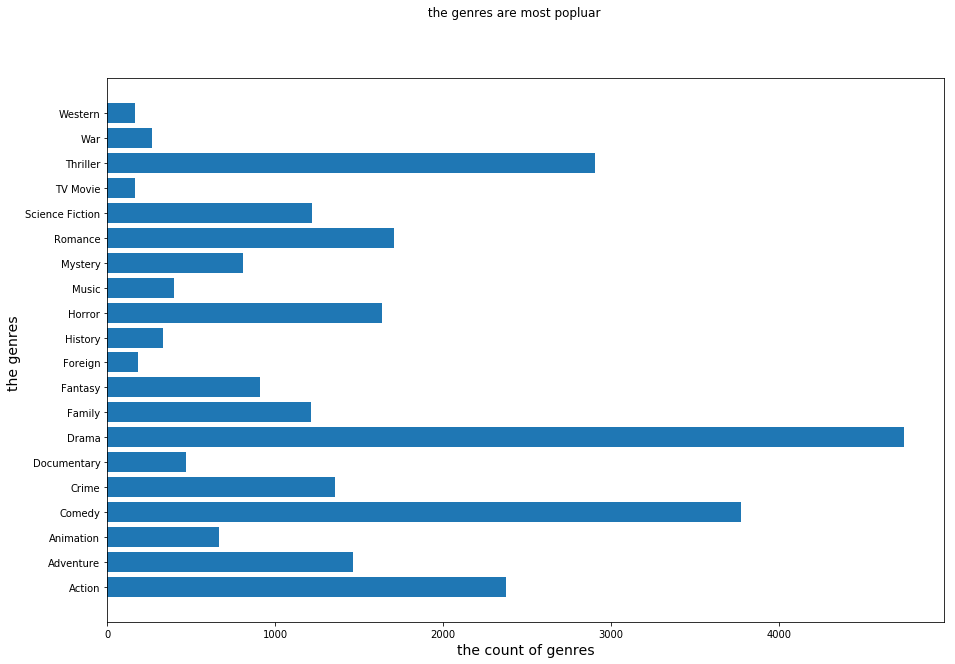

In [33]:
get_data = get_count('genres')
y_axis = get_data.index.values
x_axis = get_data.values
plt.figure(figsize=(15,10))
plt.barh(y_axis,x_axis)
plt.xlabel("the count of genres",fontsize=14)
plt.ylabel("the genres ",fontsize=14)
plt.suptitle(" the genres are most popluar")
plt.show()

> Here is a list of the most popular genres that have been in circulation over the past years

### Research Question 5) What are the top 5 genres ?

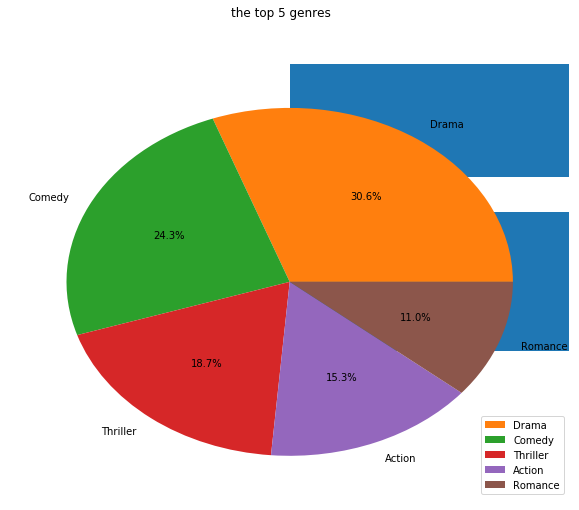

In [34]:
labels = get_data.sort_values(ascending=False).head(5).index.values
sizes = get_data.sort_values(ascending=False).head(5).values
plt.figure(figsize=(10,8))
plt.barh(y_axis,x_axis)
plt.suptitle("the top 5 genres")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.legend()
plt.show()

> Here is a list of the 5 most popular types that have been traded over the past years

### Research Question  6) What is the average runtime of the movies?


In [27]:
df_tmdb_movies['runtime'].mean()

102.46882862734135

>Here the movie have an average duration of 102.5 minutes.

### Research Question  7) Who are the most popular actors in movies?

In [28]:
#here i used the function of which will take count any column after split text
get_data = get_count('cast')
get_data.head(20)

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
Morgan Freeman        49
John Goodman          49
Liam Neeson           48
Susan Sarandon        48
Alec Baldwin          47
Julianne Moore        47
Tom Hanks             46
Gene Hackman          46
Christopher Walken    46
Johnny Depp           46
Dennis Quaid          45
Willem Dafoe          45
Ed Harris             44
dtype: int64

> Here is a list of the 20 most popular actors

### Research Question  8) which year made the highest profit with advertisement?

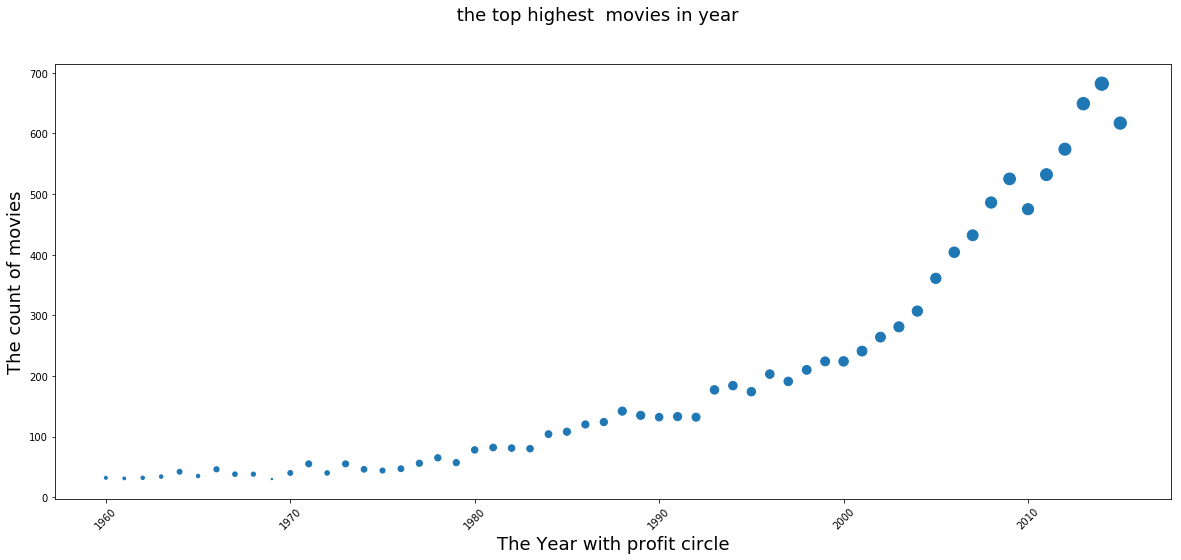

In [29]:
x_axis = df_tmdb_movies['release_year'].value_counts().index.values
y_axis = df_tmdb_movies['release_year'].value_counts().values
profit = round(  df_tmdb_movies.groupby('release_year')['net_profit_adj'].sum().sort_values(ascending=False)/100000000)
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.ylabel("The count of movies",fontsize=18)
plt.xlabel("The Year with profit circle",fontsize=18)
plt.scatter(x_axis,y_axis,s=profit)
plt.suptitle(" the top highest  movies in year",fontsize=18)
plt.legend()
plt.show()

> Here it shows the number of films produced during each year, with an explanation of the year with the most profitable films, and this is indicated by the size of the circle

<a id='conclusions'></a>
## Conclusions

<ul>
<li>> 1) From the analysis, it was found that drama and comedy films are more productive and profitable </li>
<li>> 2) the average runtime of the movies is 102.5 min </li>
<li>> 3) The number of films in 2014 were the most profitable and produced </li>
<li>> 4) Any one of these should be in the cast :Robert De Niro , Samuel L. Jackson, Bruce Willis, Nicolas Cage ,Michael Caine, Robin Williams,John Cusack </li>   
</ul>

## Limitations
> This analysis was done considering the movies which had a significant amount of profit of around 50 million dollar. This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completel corect and up-to-date

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0